# Apprentissage non supervisé 

Dans les notebooks précédents, nous avons traité des problèmes de classification ou de régression supervisés. 

L'expérience sur laquelle nous nous basons pour construire des fonctions capables de faire des prédictions est cet ensemble de données décrites par un ensemble d'attributs et d'une cible (data + target).

En classification non supervisée, seules les données sont disponibles, sans les étiquettes et souvent on ne connait même pas l'ensemble des étiquettes possibles. Les tâches d'apprentissage sont par exemple d'estimer leur distribution, de les représenter dans des espaces de plus petite dimension pour essayer de les "comprendre", ou encore de tenter de les regrouper en groupes homogènes.

Par exemples :

1. on peut faire l'hypothèse que la distribution des données est réalisée selon une loi normale (facile) ou un mélange de telles lois (beaucoup plus difficile), et il s'agit alors d'identifier les paramètres de ces lois. (Voir les [Mélanges Gaussiens](https://scikit-learn.org/stable/modules/mixture.html))
2. on peut faire l'hypothèse que les données "vivent" dans un sous espace de bien plus faible dimension et que cet espace est localement euclidien. On cherche alors la transformation qui permet de passer de l'espace d'origine à cet espace réduit. Voir l'[apprentissage de variétés](https://scikit-learn.org/stable/modules/manifold.html)
3. On peut faire l'hypothèse que les données sont réparties en groupes distincts mais homogènes et trouver des représentant de ces groupes. On réalise alors du clustering...

Il existe de nombreuses autres approches pour l'apprentissage non supervisé. Mais derrière ces tâches, il s'agit encore  très souvent  d'optimiser une fonction de coût. Illustrons cela sur le clustering, qui cherche à regrouper des données en groupes homogènes. La fonction de coût va traduire cette homogénéité. Par exemple on peut avoir comme objectif de minimiser la somme des distances entre les points à l'intérieur de chaque groupe et maximiser les distances des points entre deux groupes. 




In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.datasets import make_moons
from sklearn.cluster import SpectralClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import AffinityPropagation
rng = np.random.RandomState(42)

## Clustering

Commencer par générer des données pour illustrer le clustering. On peut réutiliser la fonction `make_blobs` de scikit-learn.

**Question** Générer un jeu de données dans $R^2$ avec `make_blobs` composé de 3 groupes de N=500 points centrés à des positions  différentes et dont l'écart type est de 0.5. 

In [2]:
N = 500 # nombre de points

In [3]:
X, y = make_blobs(n_samples=N, n_features=3, cluster_std=0.5, random_state=rng)

**Question** Tracer ces points

<AxesSubplot:>

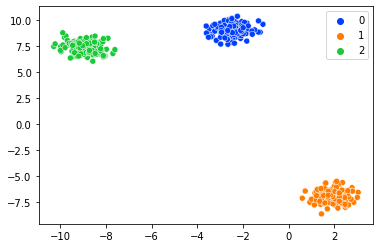

In [4]:
sns.scatterplot(X[:,0], X[:,1], hue=y, palette='bright')
#plt.scatter(X[:,0], X[:,1], c=y, cmap='Dark2')

**Question** Modifier un peu les paramètres de votre génération de façon à voir 3 groupes, mais pas complètement séparés.  Les centres doivent être en (2, 1), (-1, -2) et  (1, -1). Appelez ces données `X_blobs`, `y_blobs`.

In [5]:
X_blobs, y_blobs = make_blobs(n_samples=N, centers=[(2,1), (-1,-2), (1,-1)], n_features=3, cluster_std=0.5, random_state=rng)

**Remarque** Vous pouvez choisir la couleur des points en indiquant `c` et `cmap` à l'appel de `scatter` et choisissez la carte des couleurs en regardant `plt.colormaps?`.

<AxesSubplot:>

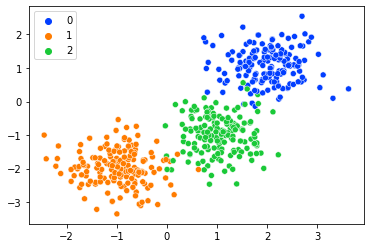

In [6]:
sns.scatterplot(X_blobs[:,0], X_blobs[:,1], hue=y_blobs, palette='bright')
# plt.scatter(X_blobs[:,0], X_blobs[:,1], c=y_blobs, cmap='Dark2')
# plt.show()

On va réaliser maintenant un clustering avec [Kmeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans). Dans cet algorithme, ([des années 50](https://en.wikipedia.org/wiki/K-means_clustering#History)), on va chercher $k$ points appelés centroïdes tels que la somme des distances des points du jeu de données à son centroïde le plus proche soit minimale. 

De façon formelle

$$\mathop{\mathrm{argmin}}_{c_1,\dots,c_k}\sum_{x\in X}\bigg(\min_{i\in[1,k]}\Vert x-c_i \Vert^2\bigg)$$

Le problème est difficile. On peut considérer qu'il y a de fortes chances qu'il n'existe pas d'algorithme en temps polynomial pour le résoudre. ([Voir](https://www.sciencedirect.com/science/article/pii/S0304397510003269)) 

L'algorithme itère les étapes suivantes: 

1. Choisir $k$ points du jeu de données et les désigner comme centroïdes
2. Tant qu'on n'a pas convergé:
    1. Affecter chaque point à son centroïde le plus proche, constituant au plus $k$ groupes
    2. Calculer les barycentres de chaque groupe. C'est le prochain ensemble de centroïdes
    
L'algorithme converge en fait en temps polynomial, mais l'étape 1 non déterministe, conduit à des solutions qui peuvent être différentes et on trouve alors une solution qui est un minimum local. On peut donc être amené à réitérer l'algorithme plusieurs fois pour tenter de trouver une "bonne" solution. 


**Question** utiliser KMeans pour trouver les clusters et afficher les centroïdes sur le graphique.

![Blobs avec leur centroides](blobsCentroides.png)

<AxesSubplot:>

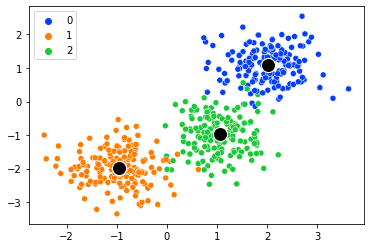

In [92]:
kmeans = KMeans(n_clusters=3, random_state=rng)
kmeans.fit(X_blobs)

sns.scatterplot(X_blobs[:,0], X_blobs[:,1], hue=y_blobs, palette='bright')
sns.scatterplot(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black', s=200)

**Question** Vous pouvez modifier certains paramètres pour voir les effets. Modifiez notamment le nombre de clusters et affichez les résultats.

<AxesSubplot:>

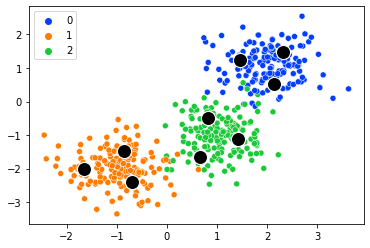

In [8]:
kmeans = KMeans(n_clusters=9, random_state=rng)
kmeans.fit(X_blobs)

sns.scatterplot(X_blobs[:,0], X_blobs[:,1], hue=y_blobs, palette='bright')
sns.scatterplot(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black', s=200)

**Question** Pourquoi existe-t-il un paramètre `n_init`?

***Ma réponse*** :

Afin de lancer KMeans avec différents points de départ

Il est possible que pour un certain set de centroids de départ, KMeans change drastiquement de centroids d'une itération à une autre, l'amenant donc potentiellement à atteindre max_iter avant d'avoir convergé

Pour éviter cela, le paramètre n_init fera en sorte de lancer plusieurs fois KMeans avec différents centroids de départ afin de s'assurer que l'algorithme converge bien vers de 'bonnes' valeurs

Le résultat renvoyé par KMeans est le 'meilleur' set de centroids qu'il estimera après avoir receuilli les résultats des n_init exécutions qu'il aura lancé

## K-means à la main...

**Question** Définir un nombre de clusters à 3. Sélectionnez dans `id_centroids` trois indices dans l'ensemble de points `X_blobs`. Appelez `centroids` ces trois points.

(*Aide* On utilise `np.random.choice`).

In [11]:
id_centroids = np.random.choice(X_blobs.shape[0], 3)
centroids   = X_blobs[id_centroids]
centroids

array([[1.30767669, 1.4815445 ],
       [2.5259752 , 0.51052238],
       [1.85680406, 1.16370989]])

**Question** Ah ah! Revenez sur le TD Broadcast pour revoir la méthode qui permet de calculer efficacement la distance au carré de tous les points à ces centroïdes dans une matrice `dist`.

In [13]:
a = X_blobs[:, np.newaxis, :]
b = centroids[np.newaxis, :, :]

dist = ((a-b)**2).sum(axis=2)
dist

array([[ 0.40836988,  1.27075148,  0.10659435],
       [20.75278711, 22.10153312, 21.57233489],
       [ 9.43638075,  4.61024267,  7.29306235],
       ...,
       [15.34966727, 14.61395534, 15.18749665],
       [16.37220531, 16.37263549, 16.54150285],
       [21.57638394, 21.10608159, 21.66485879]])

**Question** Calculez maintenant `pproche` qui est le résultat de `argmin` sur la matrice des distances. Tracez les points selon une couleur pour indiquer leur centroïde le plus proche.

![Etape 1 de Kmeans](etape1Kmeans.png)

*NB* le dessin va varier selon vos tirages!

In [14]:
pproche = np.argmin(dist, axis=1)
pproche

array([2, 0, 1, 1, 2, 0, 0, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 0, 1, 2,
       0, 0, 1, 1, 1, 2, 1, 0, 2, 1, 1, 2, 0, 0, 0, 2, 0, 0, 1, 1, 2, 2,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 2, 0, 1, 0, 0, 2, 0,
       1, 2, 1, 2, 0, 1, 1, 2, 1, 2, 2, 0, 2, 2, 1, 0, 1, 2, 0, 0, 0, 0,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 1, 1, 2, 1, 1, 2, 1, 1, 0, 1, 0,
       0, 2, 1, 1, 0, 2, 0, 1, 1, 2, 1, 1, 0, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 2, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 0, 1, 0, 0, 2, 2,
       0, 2, 2, 2, 0, 2, 1, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0,
       1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 0, 2, 1, 1, 2, 2, 0, 2, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 2, 0, 1, 1, 0, 1, 2, 0, 2, 2, 0, 0, 1, 1, 0, 1, 0,
       2, 0, 2, 1, 1, 0, 2, 1, 2, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 2, 0, 0, 1, 1, 2, 2, 2, 1, 1, 1, 0, 0, 2, 1, 1, 0, 0, 1,
       1, 0, 2, 1, 0, 2, 2, 1, 1, 2, 2, 1, 0, 2, 2, 2, 2, 1, 0, 1, 2, 1,
       0, 1, 0, 0, 0, 2, 1, 1, 0, 2, 1, 1, 1, 1, 2,

<AxesSubplot:>

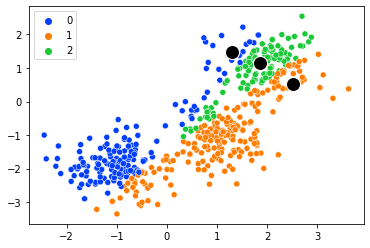

In [15]:
sns.scatterplot(X_blobs[:,0], X_blobs[:,1], hue=pproche, palette='bright')
sns.scatterplot(centroids[:,0], centroids[:,1], color='black', s=200)

**Question** Le centroïde le plus proche définit donc 3 groupes. Calculer le barycentre de chacun de ces groupes. Cela donne le nd-array appelé `new_centroids`.

In [33]:
new_centroids = []
for i in range(3):
    new_centroids.append(X_blobs[pproche==i].mean(axis=0))
new_centroids

[array([-0.66885784, -1.23653788]),
 array([ 1.11180327, -1.01507805]),
 array([1.79391432, 0.94385789])]

On a réalisé une étape de cet algorithme itératif. Pour savoir si on doit s'arrêter, une façon est de voir si les centroïdes ont bougé ou pas. On peut aussi accepter une certaine tolérance et regarder si les centroïdes ont bougé plus qu'un certain seuil.

**Question** Calculer la somme des differences au carré entre les nouveaux et les anciens centroides.

In [38]:
((centroids - new_centroids)**2).sum(axis=1)

array([11.29466057,  4.32733892,  0.05229002])

**Question** En déduire un algorithme itératif implanté dans une fonction `my_kmeans`  qui prend en argument, les données, le nombre de clusters, la tolérance pour s'arrêter et un paramètre de verbosité. Si on veut être verbeux, on affichera à chaque  tour la nouvelle différence entre les anciens et nouveaux centroïdes. La fonction retourne les centroïdes et les affectations aux clusters (sous la forme d'un vecteur comme le vecteur de prédiction dans KMeans). 

In [176]:
def my_kmeans(data, nb_cluster, tolerance):
    # on initialise les centroides
    id_centroids = np.random.choice(data.shape[0], nb_cluster)
    centroids    = data[id_centroids]

    # on ajoute une nouvelle dimension aux données et aux centroids
    a = data[:, np.newaxis, :]
    b = centroids[np.newaxis, :, :]
    
    # tant qu'on a pas convergé
    converged = False
    while(converged == False):
        # on calcule la distance entre les points et les centroides
        distance_between_points = ((a-b)**2).sum(axis=2)
        pproche  = np.argmin(distance_between_points, axis=1)

        # on calcule le prochain ensemble de centroides
        new_centroids = []
        for i in range(nb_cluster):
            new_centroids.append(X_blobs[pproche==i].mean(axis=0))

        # on vérifie si les nouveaux centroids ont bougé
        distance_between_centroids = ((centroids - new_centroids)**2).sum(axis=1)
        converged = all(distance < tolerance for distance in distance_between_centroids)

    return centroids, pproche

**Question** Faites fonctionner votre algorithme! et affichez vos résultats graphiquement!

In [53]:
centroids, pproche = my_kmeans(X_blobs, 3, 1)

<AxesSubplot:>

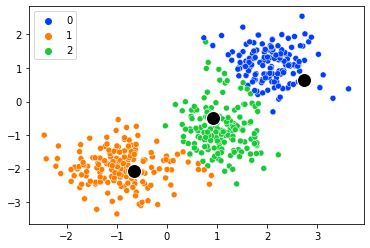

In [54]:
sns.scatterplot(X_blobs[:,0], X_blobs[:,1], hue=pproche, palette='bright')
sns.scatterplot(centroids[:,0], centroids[:,1], color='black', s=200)

# Un peu de difficulté pour k-means

**Question** Générer avec `make_moons` N exemples avec un bruit de 0.05 pour obtenir à peu près ceci. Appelez les données `X_moons` et `y_moons`.

![moons](moons.png)

<AxesSubplot:>

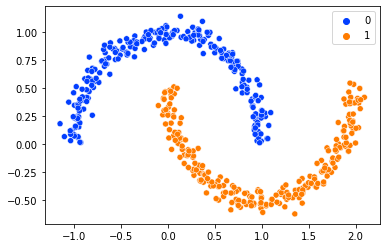

In [61]:
X_moons, y_moons = make_moons(n_samples=N, noise=0.05, random_state=rng)
sns.scatterplot(X_moons[:,0], X_moons[:,1], hue=y_moons, palette='bright')

**Question** Appliquer k-means et observer le résultat. Qu'en pensez-vous ? Donnez une justification du résultat obtenu.

<AxesSubplot:>

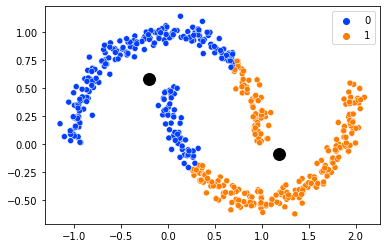

In [100]:
kmeans = KMeans(n_clusters=2, random_state=rng)
y_moons_pred = kmeans.fit_predict(X_moons)

sns.scatterplot(X_moons[:,0], X_moons[:,1], hue=y_moons_pred, palette='bright')
sns.scatterplot(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black', s=200)

*** Ma réponse :***

J'ai appliqué KMeans avec n_cluster allant de 2 à 9

En augmentant le nombre de cluster, les centroids se placent de plus en plus sur les figures. La façon dont KMeans apprend est de moins en moins évidente à mesure qu'on augmente le nombre de cluster

Cependant, en réduisant le nombre de cluster, les centroids se placent par rapport à l'ensemble des points du graphe et ne tiennent pas compte de la forme des figures. On peut même apercevoir une coupure nette entre les groupes

En faite, KMeans apprend de façon linéaire et n'est donc malheureusement pas adapté aux figures aux formes complexes dont les distributions sont non-linéaires. Du moins, c'est la conclusion à laquelle je suis parvenu avec mes expérimentations

# Spectral Clustering 

Dans l'espace de représentation des données, une bonne mesure de distance ou de similarité n'est peut être pas la distance euclidienne. Ou encore, la représentation des données n'est peut être pas la bonne. Trouver la bonne distance ou représentation à utiliser pour des algorithmes comme k-means ou k-plus proches voisins, ce n'est pas facile du tout. Le spectral clustering que nous regarderons plus en détail l'année prochaine fait un kmeans mais dans un autre espace de représentation après une transformation non linéaire.

Pour changer la représentation des données, utilisons `spectral_embedding`. L'idée est de considérer un graphe des k-plus proches voisins, et la distance est comme le temps de parcours moyen dans le graphe pour aller d'un point à un autre. Ainsi on utilise la distance euclidienne uniquement que très localement. 

![localement euclidien](./moonsmanifold.png)

Le graphe des plus proches voisins n'est pas symétrique. C'est un graphe non dirigé. Ici on le transforme en graphe dirigé pour construire la nouvelle représentation des données et la nouvelle distance. 

Le `spectral_embedding` est ensuite un calcul un peu compliqué à expliquer ici qui va grossièrement aboutir à un nouvel espace dans lequel la distance euclidienne correspond au temps de parcours moyen dans pour faire un chemin d'un noeud à un autre du graphe.  

In [101]:
from sklearn.neighbors import kneighbors_graph

nb_voisins = 50
graphe_dirige = kneighbors_graph(X_moons, nb_voisins, include_self=True)
graphe_non_dirige = 0.5 * (graphe_dirige + graphe_dirige.T)

In [102]:
from sklearn.manifold import spectral_embedding
X_moons_spec = spectral_embedding(graphe_non_dirige, n_components=2, drop_first=False)

**Question** Tracer les points dans ce nouvel espace avec leur étiquette réelle. Que constatez-vous ? 

<AxesSubplot:>

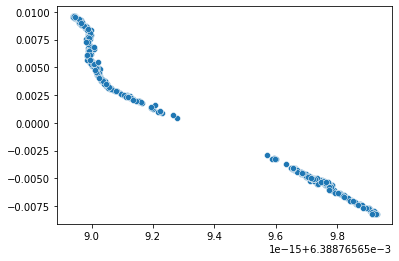

In [147]:
sns.scatterplot(X_moons_spec[:,0], X_moons_spec[:,1], palette='bright')

***Ma réponse :***

Je ne pense pas que mon graphique soit bon

J'ai continué sur cette voie car je n'arrivais pas à afficher graphe_non_dirige

**Question** Réaliser un kmeans dans ce nouvel espace avec 2 clusters. 

<AxesSubplot:>

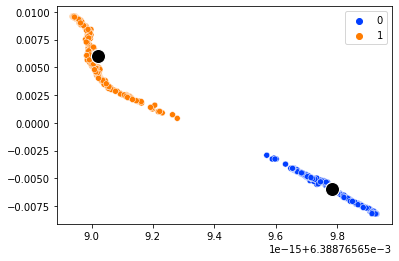

In [148]:
kmeans = KMeans(n_clusters=2, random_state=rng)
y_moons_pred = kmeans.fit_predict(X_moons_spec)

sns.scatterplot(X_moons_spec[:,0], X_moons_spec[:,1], hue=y_moons_pred, palette='bright')
sns.scatterplot(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black', s=200)

Le spectral clustering est très proche de la réalisation d'un spectral embedding suivi d'un K-means. 

**Question** Appliquer `SpectralClustering` sur les deux jeux de données. Et affichez graphiquement les résultats.

<AxesSubplot:>

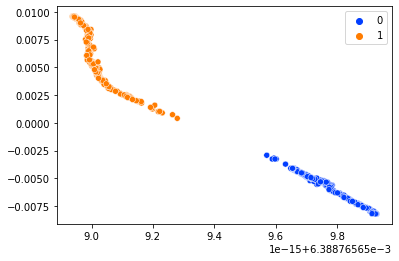

In [159]:
clustering = SpectralClustering(n_clusters=2, assign_labels='discretize', random_state=rng)
clustering.fit(X_moons_spec)

sns.scatterplot(X_moons_spec[:,0], X_moons_spec[:,1], hue=clustering.labels_, palette='bright')

# Quel nombre de clusters ?

**Question** La recherche du nombre de clusters est complexe, surtout en l'absence de supervision... Quelques méthodes tentent de deviner le nombre de clusters. Essayez `DBSCAN` et `AffinityPropagation` d'abord sur les blobs et ensuite sur les moons.  (Mettez le paramètre `eps=.15` pour `DBSCAN`). Tracez les résultats 

<AxesSubplot:>

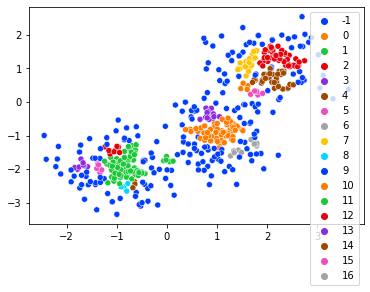

In [171]:
dbsc = DBSCAN(eps=0.15)
dbsc.fit(X_blobs)
sns.scatterplot(X_blobs[:,0], X_blobs[:,1], hue=dbsc.labels_, palette='bright')

<AxesSubplot:>

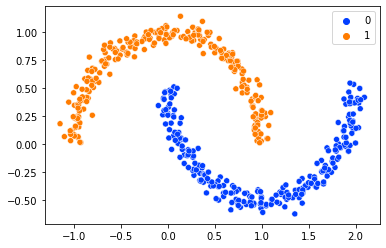

In [172]:
dbsc.fit(X_moons)
sns.scatterplot(X_moons[:,0], X_moons[:,1], hue=dbsc.labels_, palette='bright')

<AxesSubplot:>

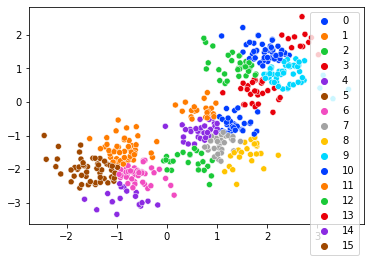

In [173]:
affpropa = AffinityPropagation(random_state=rng)
affpropa.fit(X_blobs)
sns.scatterplot(X_blobs[:,0], X_blobs[:,1], hue=affpropa.labels_, palette='bright')

<AxesSubplot:>

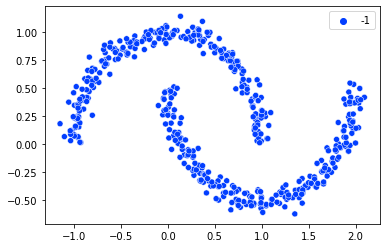

In [175]:
affpropa.fit(X_moons)
sns.scatterplot(X_moons[:,0], X_moons[:,1], hue=affpropa.labels_, palette='bright')